In [4]:
%pip install -q seaborn scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats

In [17]:
#data_sub = pd.read_csv('gender_submission.csv')
#data_test = pd.read_csv('test.csv')
data_train = pd.read_csv('train.csv')
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
#data_train.info()
data_train.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#sns.boxplot(data_train)
#z = np.abs(scipy.stats.zscore(data_train["Age"]))
#data_age = data_train['Age']
#data_age.apply(stats.zscore)
#data_age.info()

<Axes: ylabel='Age'>

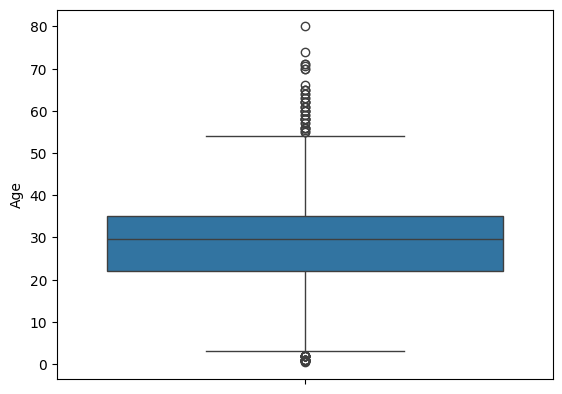

In [19]:
data_train['Age'] = data_train['Age'].fillna(data_train['Age'].mean())
sns.boxplot(data_train['Age'])

In [20]:
#Заменяем пустые на S, т.к. это самый частый класс
data_train['Embarked'].value_counts
data_train['Embarked'].replace(np.nan, 'S', inplace = True)
data_train['Embarked'].isna().sum()

0

In [23]:
# Заменяем отсутсвующие значения на знак того, что кабины не было
data_train['Cabin'] = data_train['Cabin'].fillna('None')
data_train['Cabin'].isna().sum()

0

In [12]:
px.scatter(data_train, y='Fare', x = 'Age',
            color = 'Sex'
            )

In [13]:
fig = px.histogram(data_train,
                 x = 'Age', y = 'Survived',
                color = 'Sex',
                 opacity=.6
                )
fig.show()